In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-45, 45)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=50)
lng = np.random.uniform(low=-180, high = 180, size=50)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

47

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving hithadhoo, number 0 of 47.
Retrieving piacabucu, number 1 of 47.
Retrieving mbini, number 2 of 47.
Retrieving orcopampa, number 3 of 47.
Retrieving cagayan de tawi-tawi, number 4 of 47.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving lima, number 5 of 47.
Retrieving fuerte, number 6 of 47.
Retrieving rio cuarto, number 7 of 47.
Retrieving castro, number 8 of 47.
Retrieving khasan, number 9 of 47.
Retrieving pekan, number 10 of 47.
Retrieving bambous virieux, number 11 of 47.
Retrieving domoni, number 12 of 47.
Retrieving port-gentil, number 13 of 47.
Retrieving chandauli, number 14 of 47.
Retrieving ponta do sol, number 15 of 47.
Retrieving artyom, number 16 of 47.
Retrieving luderitz, number 17 of 47.
Retrieving nahrin, number 18 of 47.
Retrieving saldanha, number 19 of 47.
Retrieving arlit, number 20 of 47.
Retrieving sao filipe, number

In [17]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')

# city_data_df.dtypes  -- used to validate dtype; uncomment to test

city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.85,74,71,6.76,MV,2021-06-15 19:37:47
1,Piaçabuçu,-10.4056,-36.4344,76.41,75,25,8.93,BR,2021-06-15 19:37:48
2,Mbini,1.5740,9.6134,77.63,86,100,7.34,GQ,2021-06-15 19:37:49
3,Orcopampa,-15.2661,-72.3417,52.92,46,87,8.08,PE,2021-06-15 19:37:50
4,Lima,-12.0432,-77.0282,73.22,67,90,9.22,PE,2021-06-15 19:37:51


##### Plotting City Data

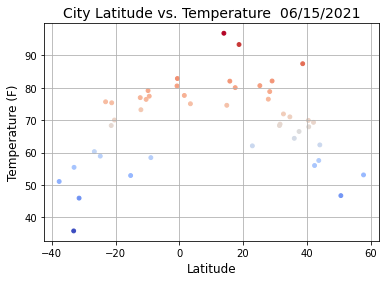

In [22]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'City Latitude vs. Temperature  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()

plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

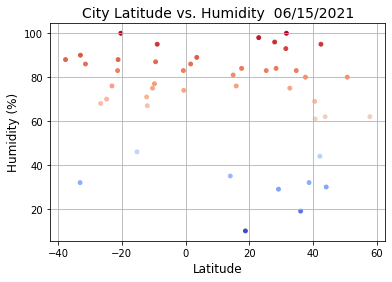

In [20]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('City Latitude vs. Humidity  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid() # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

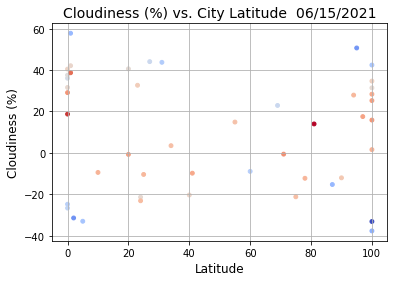

In [8]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['Cloudiness'], city_data_df['City_Lat'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

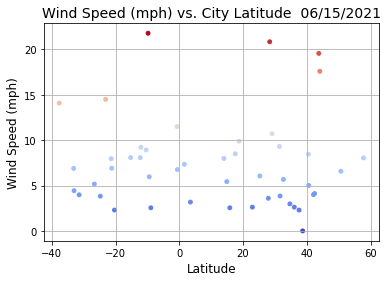

In [25]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()